# Session 11 Clustering example _ Movies

## Import movies data
Data is available on Brightspace session 11.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# prompt: import movie data from /content/drive/MyDrive/Colab Notebooks/DSO528/Week6/movies.csv

import pandas as pd

# Assuming you have mounted your Google Drive
movies = pd.read_csv('/content/drive/MyDrive/Campus/Master Study/Courses/Fall 2024/DSO-528 Blended Data Business Analytics for Efficient Decisions/In-Class Practice/Session 11/movies.csv')

# Print the first few rows to verify the import
print(movies.head())


               Title  Action  Adventure  Animation  Childrens  Comedy  \
0   Toy Story (1995)       0          0          1          1       1   
1   GoldenEye (1995)       1          1          0          0       0   
2  Four Rooms (1995)       0          0          0          0       0   
3  Get Shorty (1995)       1          0          0          0       1   
4     Copycat (1995)       0          0          0          0       0   

   Documentary  Drama  Romance  SciFi  Thriller  Year  
0            0      0        0      0         0  1995  
1            0      0        0      0         1  1995  
2            0      0        0      0         1  1995  
3            0      1        0      0         0  1995  
4            0      1        0      0         1  1995  


## Create 5 clusters
Suggested items to inculde in the prompt

*   Standarize the data
*   Which variables
*   Number of clusters to form
*   Algorithm to use (Kmeans for this course)
*   Set a seed so that the result can be reproduced
*   Make a copy of the data and put the cluster result with the copy of data





In [4]:
# prompt: use the movies data, standardize the data, form 5 clusters using all variables except Title, use kmeans with seed 528,
# make a copy of the data and save cluster label to the copy of data

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select variables for clustering (excluding 'Title')
X = movies.drop('Title', axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering with 5 clusters and seed 528
kmeans = KMeans(n_clusters=5, random_state=528)
kmeans.fit(X_scaled)

# Make a copy of the data and add the cluster labels
movies_clustered = movies.copy()
movies_clustered['Cluster'] = kmeans.labels_

# Print the first few rows of the clustered data to verify
print(movies_clustered.head())


               Title  Action  Adventure  Animation  Childrens  Comedy  \
0   Toy Story (1995)       0          0          1          1       1   
1   GoldenEye (1995)       1          1          0          0       0   
2  Four Rooms (1995)       0          0          0          0       0   
3  Get Shorty (1995)       1          0          0          0       1   
4     Copycat (1995)       0          0          0          0       0   

   Documentary  Drama  Romance  SciFi  Thriller  Year  Cluster  
0            0      0        0      0         0  1995        4  
1            0      0        0      0         1  1995        1  
2            0      0        0      0         1  1995        1  
3            0      1        0      0         0  1995        2  
4            0      1        0      0         1  1995        2  


## Create cluster summary table
Calcualte stats such as mean, sd and count for features/variables for each cluster.


**Note: **

The summary can be calculated for variables that were not used in building the clusters. For instance, in the case of our loan data, segments can be constructed using all variables except for Default. Based on the clustering results, the default proportion or probability can be calculated for each segment. This approach allows for the prediction of which segments are more likely to default and the identification of their associated characteristics.

In [5]:
# prompt: For the data created in the previous step, drop Title, calculate means for all other features by cluster, together report number of movies in each cluster

cluster_means = movies_clustered.drop('Title', axis=1).groupby('Cluster').mean()
cluster_counts = movies_clustered.groupby('Cluster')['Title'].count()

# print("Cluster Means:\n", cluster_means)
# print("\nNumber of Movies in Each Cluster:\n", cluster_counts)


Cluster Means:
            Action  Adventure  Animation  Childrens    Comedy  Documentary  \
Cluster                                                                     
0        0.045455   0.106061        0.0   0.090909  0.280303     0.000000   
1        0.216849   0.102964        0.0   0.090484  0.542902     0.073323   
2        0.060127   0.014241        0.0   0.017405  0.125000     0.004747   
3        0.500000   0.313953        0.0   0.069767  0.139535     0.000000   
4        0.025641   0.102564        1.0   0.820513  0.256410     0.000000   

            Drama   Romance     SciFi  Thriller         Year  
Cluster                                                       
0        0.492424  0.219697  0.000000  0.166667  1950.727273  
1        0.000000  0.180967  0.000000  0.196568  1993.820593  
2        1.000000  0.137658  0.000000  0.083861  1993.721519  
3        0.093023  0.058140  1.000000  0.244186  1989.197674  
4        0.000000  0.051282  0.025641  0.025641  1982.512821  

Nu

In [8]:
cluster_means

,Action,Adventure,Animation,Childrens,Comedy,Documentary,Drama,Romance,SciFi,Thriller,Year
Cluster,,,,,,,,,,,
0,0.045455,0.106061,0.0,0.090909,0.280303,0.000000,0.492424,0.219697,0.000000,0.166667,1950.727273
1,0.216849,0.102964,0.0,0.090484,0.542902,0.073323,0.000000,0.180967,0.000000,0.196568,1993.820593
2,0.060127,0.014241,0.0,0.017405,0.125000,0.004747,1.000000,0.137658,0.000000,0.083861,1993.721519
3,0.500000,0.313953,0.0,0.069767,0.139535,0.000000,0.093023,0.058140,1.000000,0.244186,1989.197674
4,0.025641,0.102564,1.0,0.820513,0.256410,0.000000,0.000000,0.051282,0.025641,0.025641,1982.512821


In [10]:
cluster_counts

,Title
Cluster,
0,132
1,641
2,632
3,86
4,39


In [12]:
# prompt: merge cluster_means and cluster_counts into one df

import pandas as pd
cluster_summary = pd.merge(cluster_means, pd.DataFrame(cluster_counts), on='Cluster')
cluster_summary

,Action,Adventure,Animation,Childrens,Comedy,Documentary,Drama,Romance,SciFi,Thriller,Year,Title
Cluster,,,,,,,,,,,,
0,0.045455,0.106061,0.0,0.090909,0.280303,0.000000,0.492424,0.219697,0.000000,0.166667,1950.727273,132
1,0.216849,0.102964,0.0,0.090484,0.542902,0.073323,0.000000,0.180967,0.000000,0.196568,1993.820593,641
2,0.060127,0.014241,0.0,0.017405,0.125000,0.004747,1.000000,0.137658,0.000000,0.083861,1993.721519,632
3,0.500000,0.313953,0.0,0.069767,0.139535,0.000000,0.093023,0.058140,1.000000,0.244186,1989.197674,86
4,0.025641,0.102564,1.0,0.820513,0.256410,0.000000,0.000000,0.051282,0.025641,0.025641,1982.512821,39


## (optional) Visualize the clusters
Create biplot using PCA (where there are more than two features)

Key elements in the prompt:

*   Use PCA (Principal Component Analysis) to create a biplot.
*   Mark the cluster centers.
*   Create circles with sizes proportional to the cluster size.
*   Shade clusters to cover 90% of the data around the centers.

Feel free to adjust scale parameters for better visual effect.



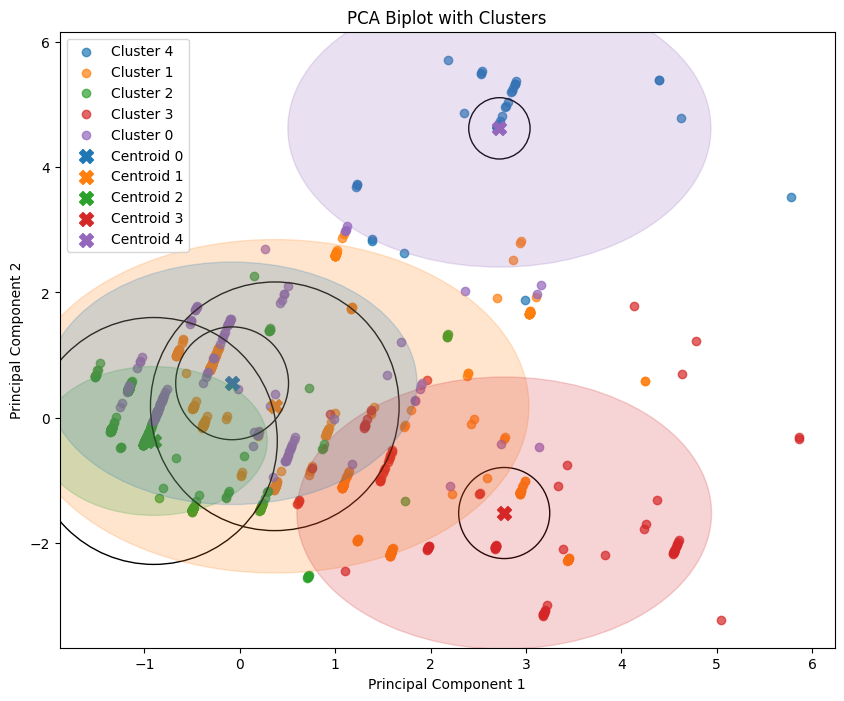

In [10]:
# prompt: Use PCA to create biplots with color for the clusters, mark the cluster centroid in the same color
# # Add a black circle for each cluster, size of the circle should be proportional to size of the cluster and can be shown in the plot.
# # Add a circle with transparent color (same color as corresponding cluster) fill for each cluster to cover 90% of the closest data to centroid

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# Add cluster labels to the principal component dataframe
finalDf = pd.concat([principalDf, movies_clustered[['Cluster']]], axis = 1)


# Calculate the centroid of each cluster
cluster_centroids = finalDf.groupby('Cluster').mean()


# Plot the biplot
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot of data points colored by cluster
for cluster in finalDf['Cluster'].unique():
    cluster_data = finalDf[finalDf['Cluster'] == cluster]
    ax.scatter(cluster_data['principal component 1'], cluster_data['principal component 2'], label=f'Cluster {cluster}', alpha=0.7)

# Plot cluster centroids with the same color as the corresponding cluster
for cluster, centroid in cluster_centroids.iterrows():
    ax.scatter(centroid['principal component 1'], centroid['principal component 2'], marker='X', s=100, color=f'C{cluster}', label=f'Centroid {cluster}')


# Calculate the size of each cluster
cluster_sizes = movies_clustered.groupby('Cluster')['Title'].count()

# Add black circles for each cluster, size proportional to cluster size
for cluster, size in cluster_sizes.items():
    centroid = cluster_centroids.loc[cluster]
    ax.scatter(centroid['principal component 1'], centroid['principal component 2'], marker='o', s=size * 50, edgecolors='black', facecolors='none')



# Calculate the 90% quantile distance from the centroid for each cluster
for cluster in finalDf['Cluster'].unique():
    cluster_data = finalDf[finalDf['Cluster'] == cluster]
    centroid = cluster_centroids.loc[cluster]
    distances = np.sqrt((cluster_data['principal component 1'] - centroid['principal component 1'])**2 + (cluster_data['principal component 2'] - centroid['principal component 2'])**2)
    quantile_90 = np.quantile(distances, 0.9)

    # Plot a transparent circle covering 90% of data around the centroid
    circle = plt.Circle((centroid['principal component 1'], centroid['principal component 2']), quantile_90, color=f'C{cluster}', fill=True, alpha=0.2)
    ax.add_artist(circle)



ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA Biplot with Clusters')
ax.legend()
plt.show()


## (Optional) Create rotating 3D biplot

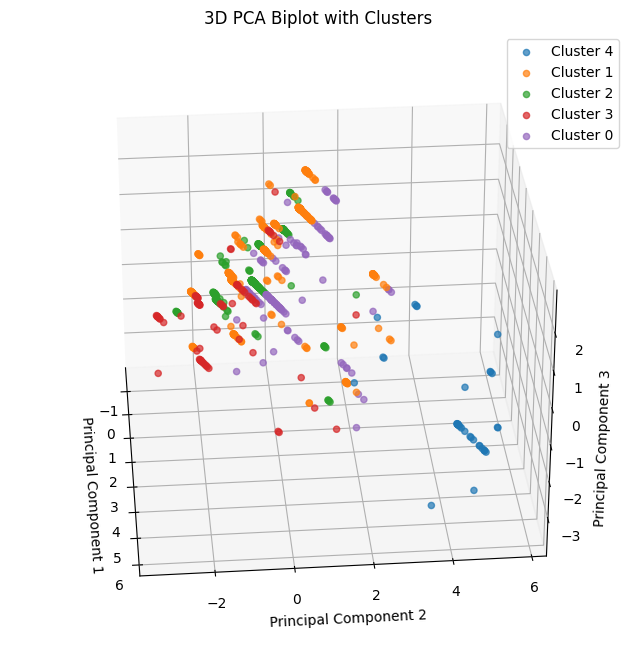

In [ ]:
# prompt: create 3D biplot using PCA, color clusters differently, make the cube rotate

%matplotlib inline
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation


# Perform PCA with 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

# Add cluster labels to the principal component dataframe
finalDf = pd.concat([principalDf, movies_clustered[['Cluster']]], axis = 1)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points colored by cluster
for cluster in finalDf['Cluster'].unique():
    cluster_data = finalDf[finalDf['Cluster'] == cluster]
    ax.scatter(cluster_data['principal component 1'], cluster_data['principal component 2'], cluster_data['principal component 3'], label=f'Cluster {cluster}', alpha=0.7)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Biplot with Clusters')
ax.legend()


# Function to update the plot for animation
def update(angle):
    ax.view_init(azim=angle) # Ensure this line correctly updates the angle
    return fig, # Return the figure object

# Create animation with blit=True (optional)
ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 360, 5), interval=100, blit=True) # Set blit=True

# Display the animation
from IPython.display import HTML
HTML(ani.to_html5_video())

## Create 6 Clusters

In [13]:
# prompt: use the movies data, standardize the data, form 6 clusters using all variables except Title, use kmeans with seed 528,
# make a copy of the data and save cluster label to the copy of data

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select variables for clustering (excluding 'Title')
X = movies.drop('Title', axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering with 6 clusters and seed 528
kmeans_6 = KMeans(n_clusters=6, random_state=528)
kmeans_6.fit(X_scaled)

# Make a copy of the data and add the cluster labels
movies_clustered_6 = movies.copy()
movies_clustered_6['Cluster'] = kmeans_6.labels_

# Print the first few rows of the clustered data to verify
print(movies_clustered_6.head())


               Title  Action  Adventure  Animation  Childrens  Comedy  \
0   Toy Story (1995)       0          0          1          1       1   
1   GoldenEye (1995)       1          1          0          0       0   
2  Four Rooms (1995)       0          0          0          0       0   
3  Get Shorty (1995)       1          0          0          0       1   
4     Copycat (1995)       0          0          0          0       0   

   Documentary  Drama  Romance  SciFi  Thriller  Year  Cluster  
0            0      0        0      0         0  1995        4  
1            0      0        0      0         1  1995        1  
2            0      0        0      0         1  1995        1  
3            0      1        0      0         0  1995        1  
4            0      1        0      0         1  1995        5  


In [14]:
# prompt: For the data created in the previous step, drop Title, calculate means for all other features by cluster, together report number of movies in each cluster

cluster_means_6 = movies_clustered_6.drop('Title', axis=1).groupby('Cluster').mean()
cluster_counts_6 = movies_clustered_6.groupby('Cluster')['Title'].count()

# print("Cluster Means:\n", cluster_means)
# print("\nNumber of Movies in Each Cluster:\n", cluster_counts)


In [15]:
cluster_means_6

,Action,Adventure,Animation,Childrens,Comedy,Documentary,Drama,Romance,SciFi,Thriller,Year
Cluster,,,,,,,,,,,
0,0.040000,0.104000,0.0,0.088000,0.296000,0.000000,0.488000,0.216000,0.000000,0.176000,1949.816000
1,0.240076,0.115312,0.0,0.109641,0.527410,0.088847,0.003781,0.000000,0.000000,0.217391,1993.587902
2,0.092683,0.039024,0.0,0.004878,0.400000,0.000000,0.429268,1.000000,0.000000,0.063415,1994.068293
3,0.500000,0.313953,0.0,0.069767,0.139535,0.000000,0.093023,0.058140,1.000000,0.244186,1989.197674
4,0.025641,0.102564,1.0,0.820513,0.256410,0.000000,0.000000,0.051282,0.025641,0.025641,1982.512821
5,0.058608,0.012821,0.0,0.020147,0.120879,0.005495,1.000000,0.000000,0.000000,0.093407,1993.494505


In [16]:
cluster_counts_6

,Title
Cluster,
0,125
1,529
2,205
3,86
4,39
5,546


In [17]:
# prompt: merge cluster_means_6 and cluster_counts_6

import pandas as pd
cluster_summary_6 = pd.merge(cluster_means_6, pd.DataFrame(cluster_counts_6), on='Cluster')
cluster_summary_6


,Action,Adventure,Animation,Childrens,Comedy,Documentary,Drama,Romance,SciFi,Thriller,Year,Title
Cluster,,,,,,,,,,,,
0,0.040000,0.104000,0.0,0.088000,0.296000,0.000000,0.488000,0.216000,0.000000,0.176000,1949.816000,125
1,0.240076,0.115312,0.0,0.109641,0.527410,0.088847,0.003781,0.000000,0.000000,0.217391,1993.587902,529
2,0.092683,0.039024,0.0,0.004878,0.400000,0.000000,0.429268,1.000000,0.000000,0.063415,1994.068293,205
3,0.500000,0.313953,0.0,0.069767,0.139535,0.000000,0.093023,0.058140,1.000000,0.244186,1989.197674,86
4,0.025641,0.102564,1.0,0.820513,0.256410,0.000000,0.000000,0.051282,0.025641,0.025641,1982.512821,39
5,0.058608,0.012821,0.0,0.020147,0.120879,0.005495,1.000000,0.000000,0.000000,0.093407,1993.494505,546


In [18]:
cluster_summary

,Action,Adventure,Animation,Childrens,Comedy,Documentary,Drama,Romance,SciFi,Thriller,Year,Title
Cluster,,,,,,,,,,,,
0,0.045455,0.106061,0.0,0.090909,0.280303,0.000000,0.492424,0.219697,0.000000,0.166667,1950.727273,132
1,0.216849,0.102964,0.0,0.090484,0.542902,0.073323,0.000000,0.180967,0.000000,0.196568,1993.820593,641
2,0.060127,0.014241,0.0,0.017405,0.125000,0.004747,1.000000,0.137658,0.000000,0.083861,1993.721519,632
3,0.500000,0.313953,0.0,0.069767,0.139535,0.000000,0.093023,0.058140,1.000000,0.244186,1989.197674,86
4,0.025641,0.102564,1.0,0.820513,0.256410,0.000000,0.000000,0.051282,0.025641,0.025641,1982.512821,39



## Summary
1.   It's observed that with 6 clusters, there is a significant number of movie titles decreasing from cluster 6 on the scenario of 5 clusters,  in which they are forming a new cluster. The cluster 2 in the 6 cluster scheme is full of Romance titles with quite strong touch of Drama and Comedy meanwhile the cluster in the 5 cluster scheme is full of Drama titles which is similar new cluster formed in 6 cluster scheme
2.   The action and adventure enjoyers can be recommended to watch movies from cluster 3 since it has bigger proportion of action and adventure genre movies compared to other clusters



